## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [4]:
from sklearn.datasets import load_boston
import random
data = load_boston()
X, y = data['data'], data['target']


In [10]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [11]:
#1. Random Choose Method to get optimal k* and *b


X_rm = X[:, 5]
trying_times = 2000
min_loss = float('inf')
best_k, best_b = None, None
for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 56.03414856944872 best_b: -13.461167417465902, and the loss is: 101086.0678952171
When time is : 1, get best_k: 14.453737591855969 best_b: -75.98447164464926, and the loss is: 116.706329250475
When time is : 20, get best_k: 3.749136563886978 best_b: -1.0311579734481882, and the loss is: 57.718399099829064
When time is : 1246, get best_k: 5.407238438000704 best_b: -12.138657063205471, and the loss is: 50.801508165135516


In [12]:
#2.Supervised Direction to get optimal k* and *b

trying_times = 2000
min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

update_time = 0

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 9, get best_k: 95.72550801702991 best_b: 26.424908859441956, and the loss is: 370361.0624748496
When time is : 19, get best_k: 94.72550801702997 best_b: 25.424908859441942, and the loss is: 361507.6886475705
When time is : 29, get best_k: 93.72550801703002 best_b: 24.424908859441928, and the loss is: 352761.43200703966
When time is : 39, get best_k: 92.72550801703008 best_b: 23.424908859441913, and the loss is: 344122.2925532545
When time is : 49, get best_k: 91.72550801703014 best_b: 22.4249088594419, and the loss is: 335590.2702862172
When time is : 59, get best_k: 90.7255080170302 best_b: 21.424908859441885, and the loss is: 327165.3652059272
When time is : 69, get best_k: 89.72550801703025 best_b: 20.42490885944187, and the loss is: 318847.5773123842
When time is : 79, get best_k: 88.72550801703031 best_b: 19.424908859441857, and the loss is: 310636.9066055878
When time is : 89, get best_k: 87.72550801703036 best_b: 18.424908859441842, and the loss is: 302533.3530855

When time is : 839, get best_k: 12.725508017031041 best_b: -56.57509114055868, and the loss is: 50.82131086408034


In [13]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [14]:
#.3. Gradient Descent to get optimal k* and *b

trying_times = 5000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 1662.8073783874947
When time is : 50, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 168.21156030701616
When time is : 100, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 167.62398613016316
When time is : 150, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 167.32604315286005
When time is : 200, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 167.02887153011932
When time is : 250, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 166.73241368351913
When time is : 300, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 166.43666788789125
When time is : 350, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 166.1416324329847
When time is : 400, get best_k: 12.625508017031041 best_b: -56.87509114055869, and t

When time is : 3850, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 147.1566748430094
When time is : 3900, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 146.90794727944947
When time is : 3950, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 146.659817125285
When time is : 4000, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 146.4122829456211
When time is : 4050, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 146.16534330900825
When time is : 4100, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 145.9189967874362
When time is : 4150, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 145.67324195632457
When time is : 4200, get best_k: 12.625508017031041 best_b: -56.87509114055869, and the loss is: 145.42807739451365
When time is : 4250, get best_k: 12.625508017031041 best_b: -56.8750911405586

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

###### 4. Try different Loss function and learning rate. 

 $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$



In [70]:
#重新计算损失函数与倒数
def loss2(y, y_hat): # to evaluate the performance 
    return sum(np.abs([(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))]))/ len(list(y))
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        # 两种情况
        if( y_i-y_hat_i)>=0:
            gradient += (-1) * x_i
        else:
            gradient=+x_i

    
    return 1 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i-y_hat_i>=0:
            gradient += (-1) 
        else:
            gradient=+1

    
    return 1 / n * gradient

In [59]:
#2.Supervised Direction to get optimal k* and *b

trying_times = 2000
min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

update_time = 0

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss2(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 9, get best_k: 82.89268102556116 best_b: -11.991804358372793, and the loss is: 544.6272609005772
When time is : 19, get best_k: 81.89268102556122 best_b: -10.991804358372796, and the loss is: 538.9002609005776
When time is : 29, get best_k: 80.89268102556127 best_b: -9.9918043583728, and the loss is: 533.1732609005779
When time is : 39, get best_k: 79.89268102556133 best_b: -8.991804358372804, and the loss is: 527.4462609005783
When time is : 49, get best_k: 78.89268102556139 best_b: -7.991804358372807, and the loss is: 521.7192609005787
When time is : 59, get best_k: 77.89268102556144 best_b: -6.991804358372811, and the loss is: 515.992260900579
When time is : 69, get best_k: 76.8926810255615 best_b: -5.991804358372814, and the loss is: 510.26526090057934
When time is : 79, get best_k: 75.89268102556156 best_b: -4.991804358372818, and the loss is: 504.5382609005798
When time is : 89, get best_k: 74.89268102556161 best_b: -3.991804358372821, and the loss is: 498.81126090

In [75]:
#.3. Gradient Descent to get optimal k* and *b

trying_times = 10000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-02


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss2(y, price_by_k_and_b)
    

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -12.507318974438386 best_b: 83.40819564162672, and the loss is: 242.04278071555788
When time is : 50, get best_k: -12.507318974438386 best_b: 83.40819564162672, and the loss is: 221.79446602421572
When time is : 100, get best_k: -12.507318974438386 best_b: 83.40819564162672, and the loss is: 201.54615133287393
When time is : 150, get best_k: -12.507318974438386 best_b: 83.40819564162672, and the loss is: 181.29783664153166
When time is : 200, get best_k: -12.507318974438386 best_b: 83.40819564162672, and the loss is: 161.0495219501899
When time is : 250, get best_k: -12.507318974438386 best_b: 83.40819564162672, and the loss is: 140.8012072588479
When time is : 300, get best_k: -12.507318974438386 best_b: 83.40819564162672, and the loss is: 120.55289256750598
When time is : 350, get best_k: -12.507318974438386 best_b: 83.40819564162672, and the loss is: 100.30457787616393
When time is : 400, get best_k: -12.507318974438386 best_b: 83.40819564162672, and th

# ！！

学习率阅越大，下降越快，但是可能产生震荡，理论上，随着迭代次数增多，梯度下降会趋于最优值

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:有时候我们并不多定义一个显示的formula，需要从数据中学习出来

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:需要很多次尝试，且结构具有很大的随机性

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:是的；
当需要学习的参数很多时，学习的速度很慢

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:沿着梯度的方向，目标函数时下降的最快的

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度就是导数，descent means the value decrease by the direction of derivative

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:the effciency is high and almost every iteration can get the smaller loss

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:learn the formula or rules from data by machine itself

In [ ]:
http://map.amap.com/service/subway?_1563435209643&srhdata=5101_drw_chengdu.json

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [122]:
#爬虫，模拟成浏览器 

import re
import urllib.request
import urllib.error
import urllib.request
headers=("User-Agent","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.140 Safari/537.36 Edge/17.17134")
opener=urllib.request.build_opener()
opener.addheaders=[headers]
urllib.request.install_opener(opener)
url="http://map.amap.com/service/subway?_1563435209643&srhdata=5101_drw_chengdu.json"
data=urllib.request.urlopen(url).read().decode('utf-8','ignore')
pat1='{"sl":"(.*?)".*?"n":"(.*?)",'
datalist=re.compile(pat1,re.S).findall(data)

city_loc={} 
for line in  datalist:
    city=line[1]
    long, lat = float(line[0].split(',')[0]), float(line[0].split(',')[1])
    city_loc[city] = (long, lat)

pat2='"ln":"(.*?)",(.*?),"kn"'
pat3='"n":"(.*?)",'
datalist2=re.compile(pat2,re.S).findall(data)
road={}
for line in datalist2:
    datalist3=re.compile(pat3,re.S).findall(line[1])
    road[line[0]]= datalist3 
    


In [123]:
road

{'1号线': ['科学城',
  '兴隆湖',
  '广州路',
  '西博城',
  '天府公园',
  '武汉路',
  '麓湖',
  '红石公园',
  '广福',
  '海昌路',
  '华阳',
  '四河',
  '华府大道',
  '天府五街',
  '天府三街',
  '世纪城',
  '锦城广场',
  '孵化园',
  '金融城',
  '高新',
  '火车南站',
  '桐梓林',
  '倪家桥',
  '省体育馆',
  '华西坝',
  '锦江宾馆',
  '天府广场',
  '骡马市',
  '文殊院',
  '人民北路',
  '火车北站',
  '升仙湖',
  '韦家碾'],
 '2号线': ['犀浦',
  '天河路',
  '百草路',
  '金周路',
  '金科北路',
  '迎宾大道',
  '茶店子客运站',
  '羊犀立交',
  '一品天下',
  '蜀汉路东',
  '白果林',
  '中医大省医院',
  '通惠门',
  '人民公园',
  '天府广场',
  '春熙路',
  '东门大桥',
  '牛王庙',
  '牛市口',
  '东大路',
  '塔子山公园',
  '成都东客站',
  '成渝立交',
  '惠王陵',
  '洪河',
  '成都行政学院',
  '大面铺',
  '连山坡',
  '界牌',
  '书房',
  '龙平路',
  '龙泉驿'],
 '3号线': ['成都医学院',
  '石油大学',
  '钟楼',
  '马超西路',
  '团结新区',
  '锦水河',
  '三河场',
  '金华寺东路',
  '植物园',
  '军区总医院',
  '熊猫大道',
  '动物园',
  '昭觉寺南路',
  '驷马桥',
  '李家沱',
  '前锋路',
  '红星桥',
  '市二医院',
  '春熙路',
  '新南门',
  '磨子桥',
  '省体育馆',
  '衣冠庙',
  '高升桥',
  '红牌楼',
  '太平园',
  '川藏立交',
  '武侯立交',
  '武青南路',
  '双凤桥',
  '龙桥路',
  '航都大街',
  '迎春桥',
  '东升',
  '双流广场',
  '三里坝',
  '双流西站'],
 '4号线': ['西河',


In [73]:
#成都地铁
station_loc={
 '四河': (104.070125, 30.516133),
 '华府大道': (104.069836, 30.525746),
 '天府五街': (104.06951, 30.537107),
 '天府三街': (104.069204, 30.546203),
 '世纪城': (104.06893, 30.55487),
 '锦城广场': (104.066528, 30.567722),
 '孵化园': (104.064313, 30.575873),
 '金融城': (104.064147, 30.582579),
 '高新': (104.063847, 30.594368),
 '火车南站': (104.067393, 30.605459),
 '桐梓林': (104.067115, 30.61531),
 '倪家桥': (104.066885, 30.624773),
 '省体育馆': (104.066606, 30.633361),
 '华西坝': (104.066279, 30.642821),
 '锦江宾馆': (104.066053, 30.650046),
 '天府广场': (104.065751, 30.657453),
 '骡马市': (104.065617, 30.666514),
 '文殊院': (104.068036, 30.672535),
 '人民北路': (104.073056, 30.684833),
 '火车北站': (104.074056, 30.695517),
 '升仙湖': (104.083474, 30.704625),
 '韦家碾': (104.08686, 30.717644),
 '科学城': (104.072328, 30.391243),
 '兴隆湖': (104.076412, 30.405196),
 '广州路': (104.077269, 30.419021),
 '西博城': (104.077289, 30.425059),
 '天府公园': (104.077748, 30.432976),
 '武汉路': (104.072802, 30.441228),
 '麓湖': (104.073293, 30.454527),
 '红石公园': (104.073007, 30.464257),
 '广福': (104.069325, 30.478693),
 '海昌路': (104.070832, 30.492415),
 '华阳': (104.070521, 30.503167),
 '犀浦': (103.971433, 30.758172),
 '天河路': (103.976163, 30.745883),
 '百草路': (103.979327, 30.733062),
 '金周路': (103.996175, 30.721638),
 '金科北路': (104.006635, 30.720762),
 '迎宾大道': (104.013528, 30.713168),
 '茶店子客运站': (104.013692, 30.705986),
 '羊犀立交': (104.012655, 30.693913),
 '一品天下': (104.01963, 30.688942),
 '蜀汉路东': (104.029048, 30.682868),
 '白果林': (104.033278, 30.673851),
 '中医大省医院': (104.0406, 30.666181),
 '通惠门': (104.048523, 30.662088),
 '人民公园': (104.056779, 30.659324),
 '春熙路': (104.080019, 30.653389),
 '东门大桥': (104.087308, 30.648192),
 '牛王庙': (104.094483, 30.644976),
 '牛市口': (104.107662, 30.637912),
 '东大路': (104.112758, 30.633295),
 '塔子山公园': (104.122922, 30.629465),
 '成都东客站': (104.13995, 30.629329),
 '成渝立交': (104.147432, 30.624822),
 '惠王陵': (104.152086, 30.612075),
 '洪河': (104.15751, 30.605015),
 '成都行政学院': (104.170954, 30.596975),
 '大面铺': (104.201298, 30.5924),
 '连山坡': (104.212757, 30.58758),
 '界牌': (104.225134, 30.582802),
 '书房': (104.242134, 30.575626),
 '龙平路': (104.258988, 30.572923),
 '龙泉驿': (104.268442, 30.560158),
 '成都医学院': (104.194681, 30.816912),
 '石油大学': (104.1866, 30.818753),
 '钟楼': (104.175313, 30.820962),
 '马超西路': (104.164715, 30.813145),
 '团结新区': (104.158768, 30.804386),
 '锦水河': (104.15331, 30.797452),
 '三河场': (104.138911, 30.784689),
 '金华寺东路': (104.125448, 30.770408),
 '植物园': (104.121411, 30.763282),
 '军区总医院': (104.114167, 30.744748),
 '熊猫大道': (104.108002, 30.725447),
 '动物园': (104.103142, 30.713648),
 '昭觉寺南路': (104.096821, 30.702922),
 '驷马桥': (104.093329, 30.695502),
 '李家沱': (104.094528, 30.689393),
 '前锋路': (104.092124, 30.679037),
 '红星桥': (104.090526, 30.671208),
 '市二医院': (104.083909, 30.660814),
 '新南门': (104.075161, 30.644361),
 '磨子桥': (104.075933, 30.637421),
 '衣冠庙': (104.052144, 30.634486),
 '高升桥': (104.042545, 30.640044),
 '红牌楼': (104.029878, 30.634704),
 '太平园': (104.02158, 30.625381),
 '川藏立交': (104.006465, 30.622935),
 '武侯立交': (103.99342, 30.62696),
 '武青南路': (103.98508, 30.623124),
 '双凤桥': (103.969203, 30.615958),
 '龙桥路': (103.943744, 30.604427),
 '航都大街': (103.936874, 30.591323),
 '迎春桥': (103.93492, 30.580647),
 '东升': (103.925316, 30.571218),
 '双流广场': (103.920196, 30.564269),
 '三里坝': (103.914567, 30.553562),
 '双流西站': (103.917258, 30.543286),
 '西河': (104.220309, 30.647527),
 '明蜀王陵': (104.196245, 30.648246),
 '成都大学': (104.180975, 30.646668),
 '十陵': (104.172438, 30.645829),
 '来龙': (104.164584, 30.64683),
 '槐树店': (104.139309, 30.648877),
 '万年场': (104.119188, 30.644231),
 '双桥路': (104.113278, 30.646975),
 '玉双路': (104.099315, 30.653452),
 '太升南路': (104.076578, 30.664767),
 '宽窄巷子': (104.050663, 30.665399),
 '草堂北路': (104.028178, 30.669093),
 '西南财大': (104.020126, 30.670475),
 '文化宫': (104.0094, 30.672267),
 '清江西路': (103.998588, 30.676605),
 '成都西站': (103.976576, 30.683665),
 '中坝': (103.96411, 30.673492),
 '蔡桥': (103.945088, 30.669474),
 '非遗博览园': (103.922478, 30.674086),
 '马厂坝': (103.9139, 30.677386),
 '凤凰大街': (103.889623, 30.677495),
 '涌泉': (103.873262, 30.678874),
 '光华公园': (103.860754, 30.68485),
 '南熏大道': (103.851736, 30.6896),
 '凤溪河': (103.843092, 30.686167),
 '杨柳河': (103.831101, 30.680905),
 '万盛': (103.818887, 30.675357),
 '北站西二路': (104.066286, 30.694613),
 '九里堤': (104.057119, 30.69464),
 '西南交大': (104.049053, 30.694387),
 '花照壁': (104.040831, 30.696626),
 '茶店子': (104.030835, 30.696229),
 '金沙博物馆': (104.01252, 30.677436),
 '东坡路': (104.007924, 30.660867),
 '龙爪堰': (104.008496, 30.651345),
 '武侯大道': (104.012928, 30.637011),
 '高朋大道': (104.03266, 30.617319),
 '神仙树': (104.047107, 30.609294),
 '三瓦窑': (104.07746, 30.604107),
 '琉璃场': (104.10064, 30.607534),
 '四川师大': (104.116054, 30.609368),
 '狮子山': (104.124311, 30.615942),
 '大观': (104.133057, 30.621601),
 '迎晖路': (104.139649, 30.638288),
 '双店路': (104.136956, 30.657581),
 '崔家店': (104.136427, 30.66542),
 '理工大学': (104.135198, 30.674182),
 '二仙桥': (104.12636, 30.68088),
 '八里庄': (104.118056, 30.687128),
 '府青路': (104.107227, 30.694472),
 '簇锦': (104.008245, 30.611182),
 '华兴': (104.001114, 30.598405),
 '金花': (103.970064, 30.591577),
 '双流机场1航站楼': (103.959257, 30.578543),
 '双流机场2航站楼': (103.955607, 30.569892)}

In [74]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
def get_geo_distance(city1, city2):
    return geo_distance(city_loc[city1], city_loc[city2])

In [75]:
get_geo_distance('杨柳河','万盛') 

1.3661117702453707

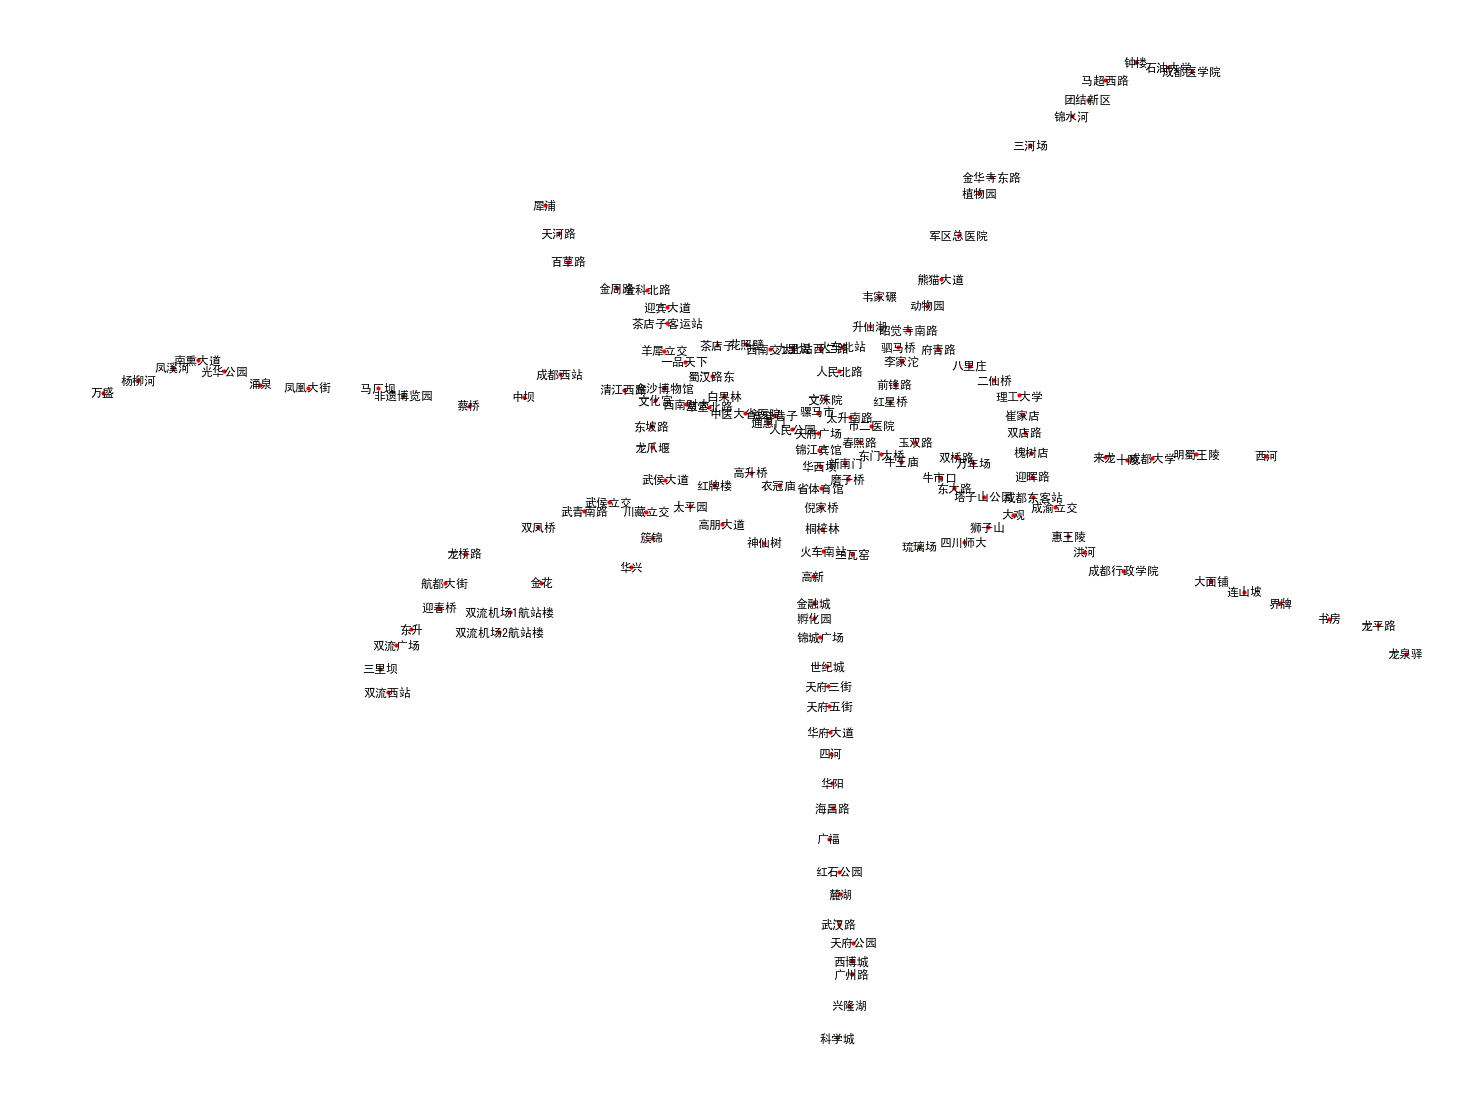

In [77]:
import networkx as nx
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
# matplotlib.rcParams['figure.figsize']=(50, 50)
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_loc.keys()))
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20, 15)
nx.draw(city_graph, station_loc, with_labels=True, node_size=10)

In [58]:
road={'1号线': ['科学城',
  '兴隆湖',
  '广州路',
  '西博城',
  '天府公园',
  '武汉路',
  '麓湖',
  '红石公园',
  '广福',
  '海昌路',
  '华阳',
  '四河',
  '华府大道',
  '天府五街',
  '天府三街',
  '世纪城',
  '锦城广场',
  '孵化园',
  '金融城',
  '高新',
  '火车南站',
  '桐梓林',
  '倪家桥',
  '省体育馆',
  '华西坝',
  '锦江宾馆',
  '天府广场',
  '骡马市',
  '文殊院',
  '人民北路',
  '火车北站',
  '升仙湖',
  '韦家碾'],
 '2号线': ['犀浦',
  '天河路',
  '百草路',
  '金周路',
  '金科北路',
  '迎宾大道',
  '茶店子客运站',
  '羊犀立交',
  '一品天下',
  '蜀汉路东',
  '白果林',
  '中医大省医院',
  '通惠门',
  '人民公园',
  '天府广场',
  '春熙路',
  '东门大桥',
  '牛王庙',
  '牛市口',
  '东大路',
  '塔子山公园',
  '成都东客站',
  '成渝立交',
  '惠王陵',
  '洪河',
  '成都行政学院',
  '大面铺',
  '连山坡',
  '界牌',
  '书房',
  '龙平路',
  '龙泉驿'],
 '3号线': ['成都医学院',
  '石油大学',
  '钟楼',
  '马超西路',
  '团结新区',
  '锦水河',
  '三河场',
  '金华寺东路',
  '植物园',
  '军区总医院',
  '熊猫大道',
  '动物园',
  '昭觉寺南路',
  '驷马桥',
  '李家沱',
  '前锋路',
  '红星桥',
  '市二医院',
  '春熙路',
  '新南门',
  '磨子桥',
  '省体育馆',
  '衣冠庙',
  '高升桥',
  '红牌楼',
  '太平园',
  '川藏立交',
  '武侯立交',
  '武青南路',
  '双凤桥',
  '龙桥路',
  '航都大街',
  '迎春桥',
  '东升',
  '双流广场',
  '三里坝',
  '双流西站'],
 '4号线': ['西河',
  '明蜀王陵',
  '成都大学',
  '十陵',
  '来龙',
  '槐树店',
  '万年场',
  '双桥路',
  '玉双路',
  '市二医院',
  '太升南路',
  '骡马市',
  '宽窄巷子',
  '中医大省医院',
  '草堂北路',
  '西南财大',
  '文化宫',
  '清江西路',
  '成都西站',
  '中坝',
  '蔡桥',
  '非遗博览园',
  '马厂坝',
  '凤凰大街',
  '涌泉',
  '光华公园',
  '南熏大道',
  '凤溪河',
  '杨柳河',
  '万盛'],
 '7号线': ['火车北站',
  '北站西二路',
  '九里堤',
  '西南交大',
  '花照壁',
  '茶店子',
  '一品天下',
  '金沙博物馆',
  '文化宫',
  '东坡路',
  '龙爪堰',
  '武侯大道',
  '太平园',
  '高朋大道',
  '神仙树',
  '火车南站',
  '三瓦窑',
  '琉璃场',
  '四川师大',
  '狮子山',
  '大观',
  '成都东客站',
  '迎晖路',
  '槐树店',
  '双店路',
  '崔家店',
  '理工大学',
  '二仙桥',
  '八里庄',
  '府青路',
  '驷马桥'],
 '10号线': ['太平园', '簇锦', '华兴', '金花', '双流机场1航站楼', '双流机场2航站楼']}

In [69]:
from collections import defaultdict
station_connection = defaultdict(list)
for line in road:
    stations=road[line]
    for i in range(len(stations)-1):    
        s1=stations[i]
        s2=stations[i+1]   
        if s1 == s2:
            continue 
        station_connection[s1].append(s2)
        station_connection[s2].append(s1)
    

In [65]:

for i in range(len(stations)-1):    
    s1=stations[i]
    s2=stations[i+1]   
    if s1 == s2:
        continue 
    station_connection[s1].append(s2)
    station_connection[s2].append(s1)

In [70]:
station_connection

defaultdict(list,
            {'科学城': ['兴隆湖'],
             '兴隆湖': ['科学城', '广州路'],
             '广州路': ['兴隆湖', '西博城'],
             '西博城': ['广州路', '天府公园'],
             '天府公园': ['西博城', '武汉路'],
             '武汉路': ['天府公园', '麓湖'],
             '麓湖': ['武汉路', '红石公园'],
             '红石公园': ['麓湖', '广福'],
             '广福': ['红石公园', '海昌路'],
             '海昌路': ['广福', '华阳'],
             '华阳': ['海昌路', '四河'],
             '四河': ['华阳', '华府大道'],
             '华府大道': ['四河', '天府五街'],
             '天府五街': ['华府大道', '天府三街'],
             '天府三街': ['天府五街', '世纪城'],
             '世纪城': ['天府三街', '锦城广场'],
             '锦城广场': ['世纪城', '孵化园'],
             '孵化园': ['锦城广场', '金融城'],
             '金融城': ['孵化园', '高新'],
             '高新': ['金融城', '火车南站'],
             '火车南站': ['高新', '桐梓林', '神仙树', '三瓦窑'],
             '桐梓林': ['火车南站', '倪家桥'],
             '倪家桥': ['桐梓林', '省体育馆'],
             '省体育馆': ['倪家桥', '华西坝', '磨子桥', '衣冠庙'],
             '华西坝': ['省体育馆', '锦江宾馆'],
             '锦江宾馆': ['华西坝', '天府广场'],
             

In [71]:
station_with_road = nx.Graph(station_connection)

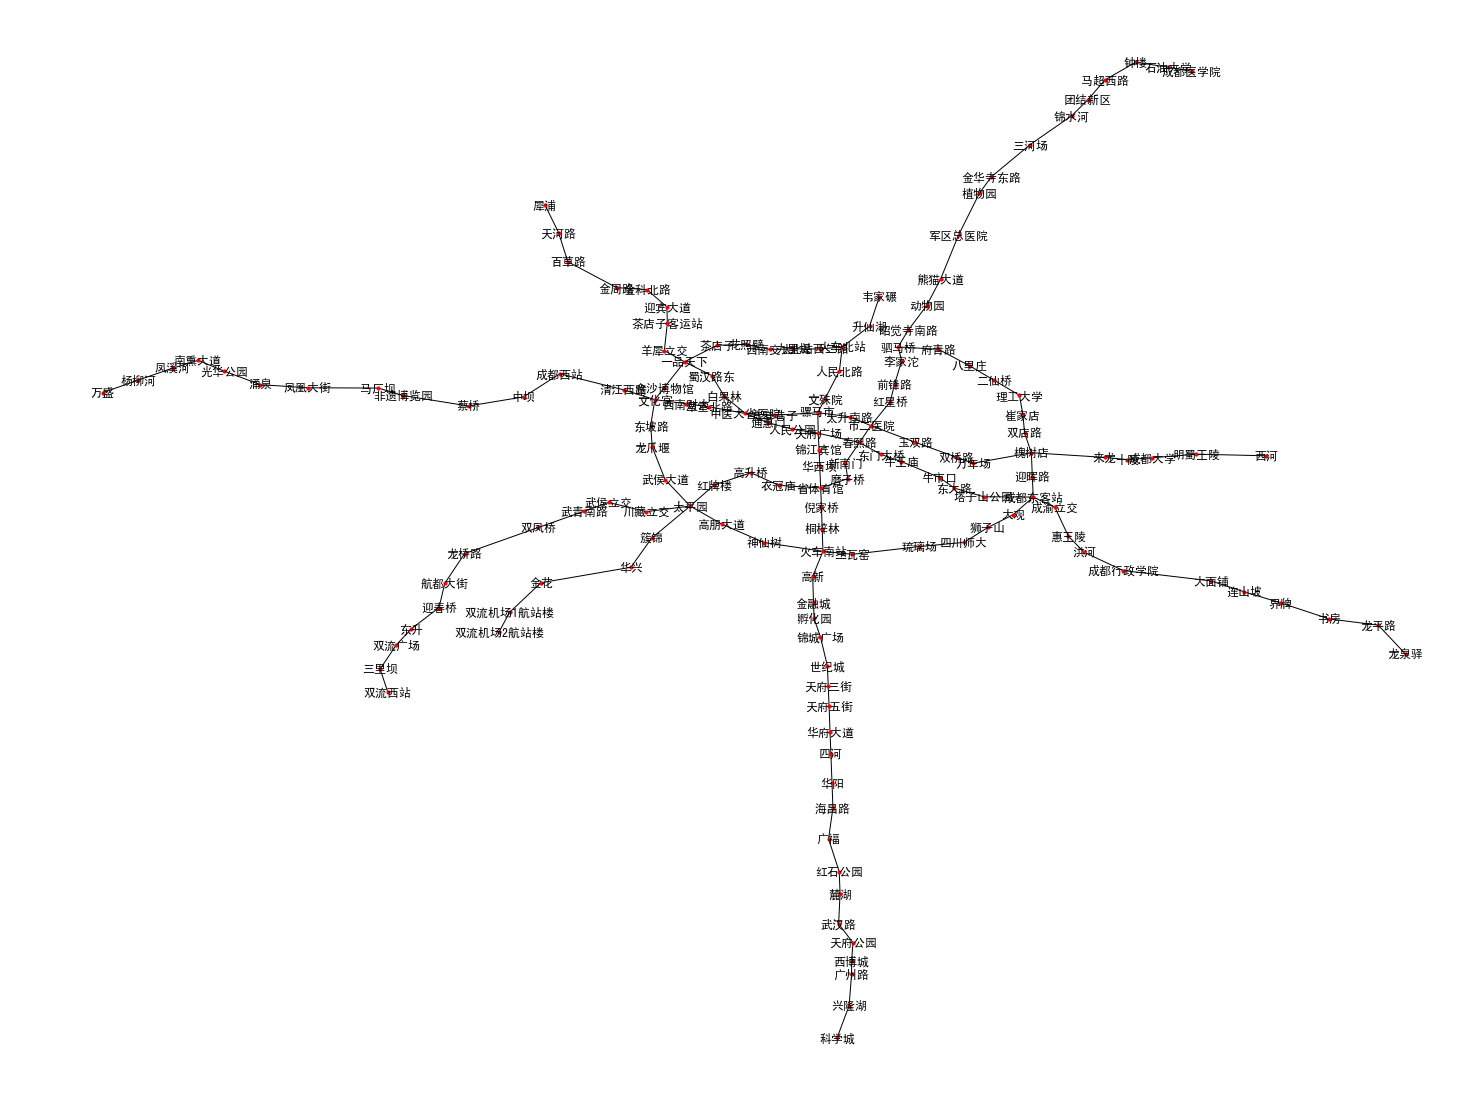

In [78]:
nx.draw(station_with_road, station_loc, with_labels=True, node_size=10)

##### 3. Build the search agent

> Build the search agent based on the graph we build.


In [86]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_geo_distance(path[i - 1], path[i])
        return distance

    return sorted(pathes, key=get_path_distnace)

def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)


def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [80]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: 
            continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path:
                continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            #print(pathes)
            
            if city == destination:
                return new_path
        
        visitied.add(froninter)
     
       
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
       
        

In [83]:
search('春熙路', '宽窄巷子', station_connection, sort_candidate=transfer_stations_first) 

['春熙路', '天府广场', '骡马市', '宽窄巷子']

In [87]:
search('春熙路', '宽窄巷子', station_connection, sort_candidate=shortest_path_first)

['春熙路', '天府广场', '骡马市', '宽窄巷子']

In [84]:
search('春熙路', '宽窄巷子', station_connection, sort_candidate=transfer_as_much_possible)

['春熙路',
 '天府广场',
 '锦江宾馆',
 '华西坝',
 '省体育馆',
 '倪家桥',
 '桐梓林',
 '火车南站',
 '神仙树',
 '高朋大道',
 '太平园',
 '武侯大道',
 '龙爪堰',
 '东坡路',
 '文化宫',
 '西南财大',
 '草堂北路',
 '中医大省医院',
 '宽窄巷子']

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

# Comprehensive Priority(综合优先)

# but also include the @param by_way stations. 

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)